:orphan:
# Plotting Linear Regression
Simple case with only $\theta_1$

In [257]:
from myst_nb import glue
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from itertools import chain

## For illustration: 3D 'bowl'
Source: https://www.alphacodingskills.com/matplotlib/matplotlib-3d-contour-plot.php 

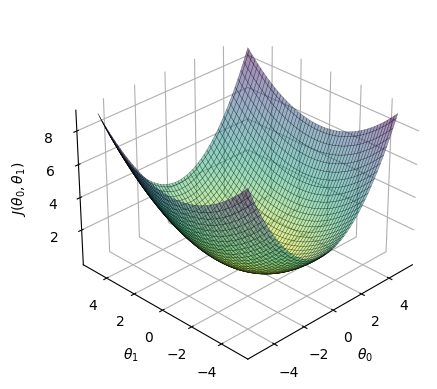

In [297]:
plt.rcParams.update(plt.rcParamsDefault)

#params = {
#        'xtick.labelsize':'small',
#        'ytick.labelsize':'small',
#        'axes.labelsize': 'medium'}
#plt.rcParams.update(params)

xlist = np.linspace(-5.0, 5.0, 100)
ylist = ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)

#creating elliptical plane
Z = (X**2)/4 + (Y**2)/9

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#drawing contour plot
surf = ax.plot_surface(X,Y,Z, cmap='viridis_r', linewidth=0.3, alpha = 0.5, edgecolor = 'k')

#ax.set_title('3D Contour Plot')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$') 
ax.set_zlabel('$J(\\theta_0, \\theta_1)$', rotation='90')
#plt.title('Cost Function $J(\\theta_0, \\theta_1)$', loc='left', fontsize = 15)
ax.azim = 225
ax.xaxis.set_rotate_label(False); ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_rotate_label(False); ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_rotate_label(False); ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

glue("plot_linReg_bowl", fig, display=False)

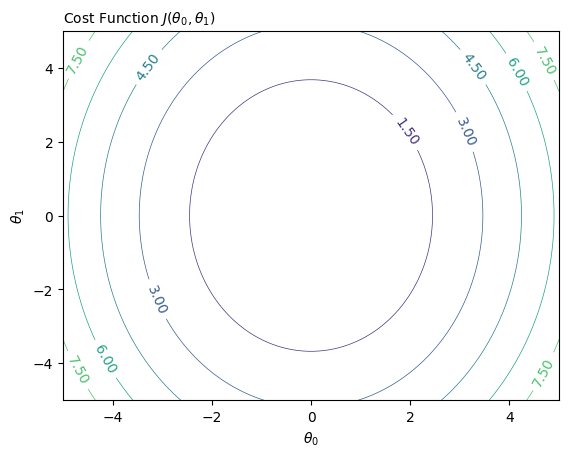

In [279]:
plt.rcParams.update(plt.rcParamsDefault)

#levs = range(0,10,0.5) #chain(range(0,50,5), range(50,200, 10))

fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z, linewidths=0.5)
ax.clabel(CS, CS.levels[0:10], inline=1, fontsize=10, fmt='%.2f')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
plt.title('Cost Function $J(\\theta_0, \\theta_1)$', loc='left', fontsize = 10)

glue("plot_linReg_bowl_contour", fig, display=False)

## Cost function by hand with 4 points

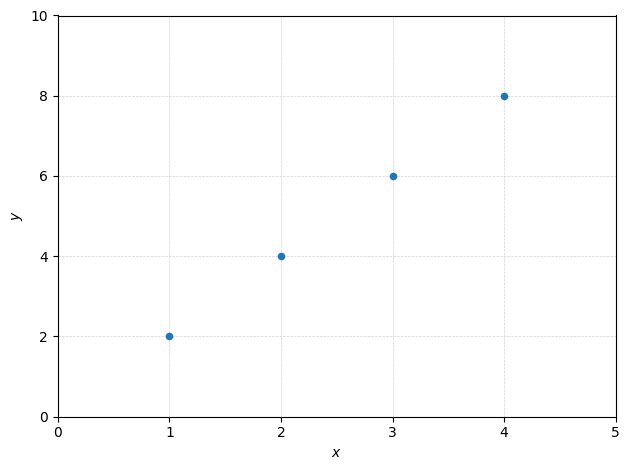

In [55]:
plt.rcParams.update(plt.rcParamsDefault)

fig, ax = plt.subplots()
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

# Draw a grid:
ax.set_axisbelow(True)
ax.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5)

ax.set_xlim([0, 5])
ax.set_ylim([0, 10])

ax.scatter(x, y, s=20)
ax.set_xlabel('$x$') 
ax.set_ylabel('$y$')
plt.tight_layout()

glue("plot_linReg_1234", fig, display=False)

In [140]:
def h_lin(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

def costFunctionLinRegression( x_vals, y_vals, theta_0, theta_1): # x and y are lists
    
    m = len(x_vals)

    if m != len(y_vals):
        raise ValueError('The lists of x and y values are not the same length!')

    sum_error_squared = 0

    for x , y in zip(x_vals, y_vals):
        sum_error_squared  += ( h_lin(theta_0, theta_1, x) - y )**2 
    
    return (1/(2*m)) * sum_error_squared

In [141]:
theta_0 = 0

print("The x values:")
print(x)
print("The y values:")
print(y)

theta_1_vals = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]
costs = []
for theta_1 in theta_1_vals:
    cost = costFunctionLinRegression( x, y, theta_0, theta_1)
    print("With theta = %.1f\tcost = %.2f" %(theta_1, cost))
    costs.append(cost)

print(costs)

The x values:
[1, 2, 3, 4]
The y values:
[2, 4, 6, 8]
With theta = 0.0	cost = 15.00
With theta = 0.5	cost = 8.44
With theta = 1.0	cost = 3.75
With theta = 1.5	cost = 0.94
With theta = 2.0	cost = 0.00
With theta = 2.5	cost = 0.94
With theta = 3.0	cost = 3.75
With theta = 3.5	cost = 8.44
[15.0, 8.4375, 3.75, 0.9375, 0.0, 0.9375, 3.75, 8.4375]


Plotting now the cost function w.r.t. parameter theta 1:

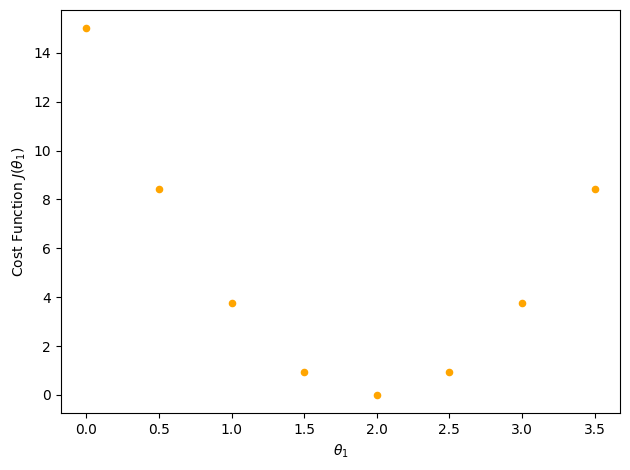

In [143]:
plt.rcParams.update(plt.rcParamsDefault)

fig, ax = plt.subplots()

ax.scatter(theta_1_vals, costs, c='orange', s=20)
ax.set_xlabel('$\\theta_1$') 
ax.set_ylabel('Cost Function $J(\\theta_1)$')
plt.tight_layout()

glue("plot_linReg_costvstheta1", fig, display=False)


## The data example

Here are some data.

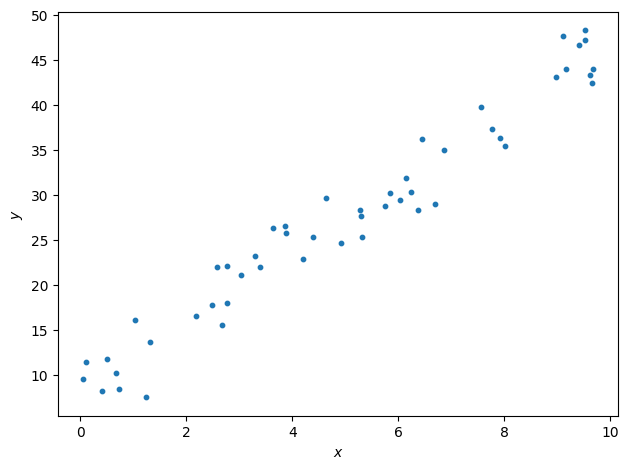

In [383]:
x = 10*np.random.rand(50)
y = 2 + 4 * x + 10*np.random.rand(50)

fig, ax = plt.subplots()
ax.scatter(x, y, s=10)
ax.set_xlabel('$x$') 
ax.set_ylabel('$y$')
plt.tight_layout()

glue("plot_linReg_50pts", fig, display=False)


In [416]:
def residuals_func(v, x, y):
    return y - (v[1]*x+v[0])

res = scipy.optimize.least_squares(residuals_func, x0=[0, 0], args=(x,y))
print(f"best-fit line: {res.x[1]:.3f}*x + {res.x[0]:.3f}")

best-fit line: 3.779*x + 8.599


In [381]:
def get_residuals(Theta, x, y):
    return ( Theta[1]*x + Theta[0] ) - y

## Linear Regression 'by hand' 

In [458]:
# 0. Hyperparameters
alpha = 0.05
N = 1000

# Other parameters:
m = len(x) # sample size
if m != len(y): raise ValueError('The lists of x and y values are not the same length!')

# 1. Initialization
theta_0 = 25
theta_1 = 0

# Store theta (weights) values for Gradient Descent (GD) visualizations
weights_GD_0 = np.array([theta_0])
weights_GD_1 = np.array([theta_1])

print("Starting gradient descent\n")

# 2. Iteration
for n in range(1,N+1):

    # 2.1. Derivatives: of the form ( h(theta) - y ) 
    Theta = [theta_0, theta_1]
    residuals = get_residuals(Theta, x, y)

    sum_residuals   = sum(residuals)
    sum_residuals_x = sum(residuals * x)

    # 2.2. Calculate new parameters:
    theta_0_new = theta_0 - alpha * (1/m) * sum_residuals
    theta_1_new = theta_1 - alpha * (1/m) * sum_residuals_x

    # Store thetas (for plotting purposes)
    weights_GD_0 = np.append(weights_GD_0, theta_0_new)
    weights_GD_1 = np.append(weights_GD_1, theta_1_new)

    # Printing every 10 iterations
    if (n<100 and n % 10 == 0) or (n>100 and n % 100 == 0):
        print("Iteration %d\t\ttheta_0 = %.3f\t\tDiff = %.4f\t\ttheta_1 = %.3f\t\tDiff = %.4f" %(n, theta_0_new, theta_0_new-theta_0, theta_1_new, theta_1_new-theta_1 ))

    # 2.3. Update the parameters for next iteration
    theta_0 = theta_0_new
    theta_1 = theta_1_new

    # Is the exit condition met?
    if abs(sum_residuals) < 0.001 and abs(sum_residuals_x) < 0.001:
        print("\n ! The derivatives are zero! Exiting gradient descent.")
        break

print("\nEnd of gradient descent after %d iterations" % n)


Starting gradient descent

Iteration 10		theta_0 = 23.168		Diff = -0.2077		theta_1 = 1.557		Diff = -0.0880
Iteration 20		theta_0 = 21.401		Diff = -0.1678		theta_1 = 1.868		Diff = 0.0206
Iteration 30		theta_0 = 19.843		Diff = -0.1469		theta_1 = 2.102		Diff = 0.0217
Iteration 40		theta_0 = 18.475		Diff = -0.1290		theta_1 = 2.306		Diff = 0.0192
Iteration 50		theta_0 = 17.273		Diff = -0.1133		theta_1 = 2.485		Diff = 0.0169
Iteration 60		theta_0 = 16.218		Diff = -0.0995		theta_1 = 2.643		Diff = 0.0148
Iteration 70		theta_0 = 15.291		Diff = -0.0874		theta_1 = 2.781		Diff = 0.0130
Iteration 80		theta_0 = 14.476		Diff = -0.0768		theta_1 = 2.902		Diff = 0.0114
Iteration 90		theta_0 = 13.761		Diff = -0.0674		theta_1 = 3.009		Diff = 0.0100
Iteration 200		theta_0 = 9.838		Diff = -0.0162		theta_1 = 3.594		Diff = 0.0024
Iteration 300		theta_0 = 8.938		Diff = -0.0044		theta_1 = 3.728		Diff = 0.0007
Iteration 400		theta_0 = 8.692		Diff = -0.0012		theta_1 = 3.765		Diff = 0.0002
Iteration 500		theta_0 =

Get the set of points from every 100 iterations

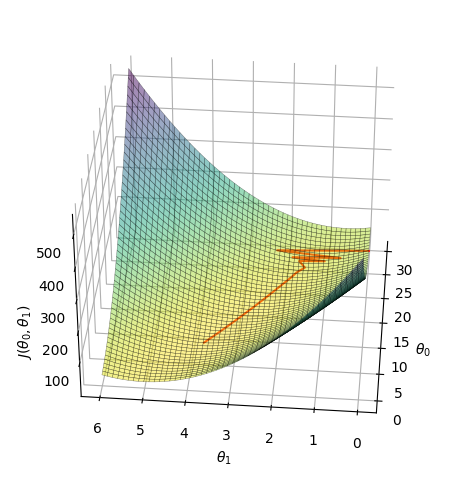

In [465]:
# Thetas from GD: first 5 and every 10 iterations
theta_0_pts = np.concatenate( (weights_GD_0[0:5], weights_GD_0[5::5]), axis=None)
theta_1_pts = np.concatenate( (weights_GD_1[0:5], weights_GD_1[5::5]), axis=None)

# Grid for 2D parameter space:
theta_0_grid = np.linspace(0, 30, 50) # (1, 24, 50)
theta_1_grid = np.linspace(0, 6, 50) # (0, 6, 50)

# Z values of costs for the grid:
Theta0, Theta1 = np.meshgrid(theta_0_grid, theta_1_grid)
Costs = costFunctionLinRegression( x, y, Theta0, Theta1 )

# Cost for selected intermediary weights:
Costs_wGD = costFunctionLinRegression(  x, y, theta_0_pts, theta_1_pts)



fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(theta_0_pts, theta_1_pts, Costs_wGD, c='r')
surf = ax.plot_surface(Theta0, Theta1, Costs, cmap='viridis_r', linewidth=0.3, alpha = 0.5, edgecolor = 'k')

ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta_0, \\theta_1)$', rotation=90)
ax.azim = 185 # 200
ax.elev = 35 # 30
ax.xaxis.set_rotate_label(False); ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_rotate_label(False); ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_rotate_label(False); ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#plt.title('Cost Function $J(\\theta_0, \\theta_1)$', loc='left', fontsize = 10)
plt.tight_layout()

glue("plot_linReg_3D", fig, display=False)

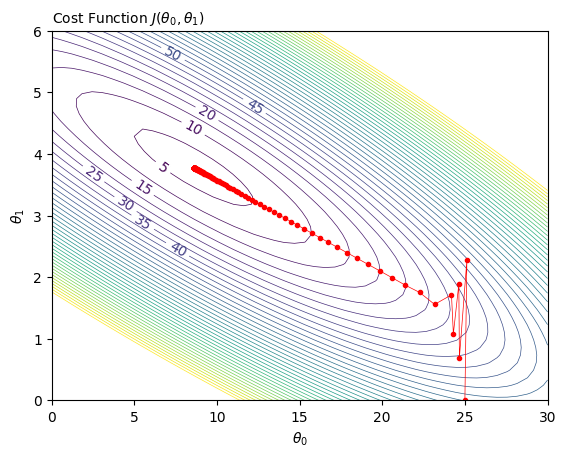

In [460]:
plt.rcParams.update(plt.rcParamsDefault)

levs = range(5,200,5) #chain(range(0,50,5), range(50,200, 10))

fig, ax = plt.subplots()
CS = ax.contour(Theta0, Theta1, Costs, levs, linewidths=0.5)
ax.clabel(CS, CS.levels[0:10], inline=1, fontsize=10, fmt='%d')
ax.plot(theta_0_pts, theta_1_pts, marker=".", c="r", lw=0.5)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
plt.title('Cost Function $J(\\theta_0, \\theta_1)$', loc='left', fontsize = 10)

glue("plot_linReg_contour", fig, display=False)